In [95]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import config

In [96]:
channel_ids = [
            # 'UCnz-ZXXER4jOvuED5trXfEA', #techTFQ
            # 'UCLLw7jmFsvfIVaUFsLs8mlQ', #Luke Barousse
            'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
            # 'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the Analyst
            # 'UC2UXDak6o7rBm23k3Vv5dww' # Tina Huang
            ]

api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=config.api_key)

## Function to get channel statistics

In [97]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part ='snippet,contentDetails,statistics',
                id = ','.join(channel_ids))
    
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                )
        all_data.append(data)

    return all_data

In [98]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [99]:
channel_data = pd.DataFrame(channel_statistics)

In [100]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Ken Jee,244000,8140274,276,UUiT9RITQ9PW6BhXK0y2jaeg


In [101]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [102]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

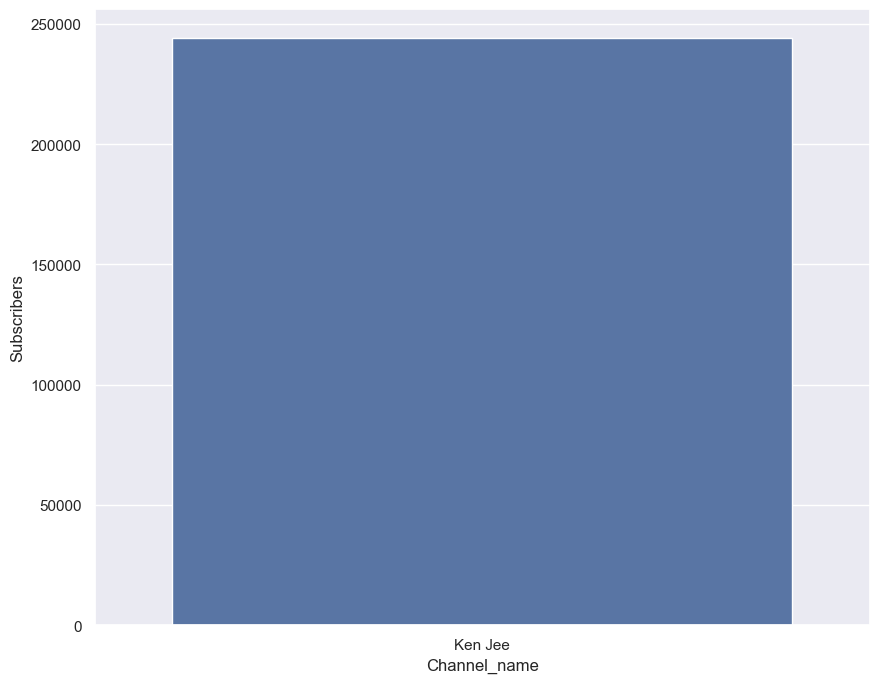

In [103]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

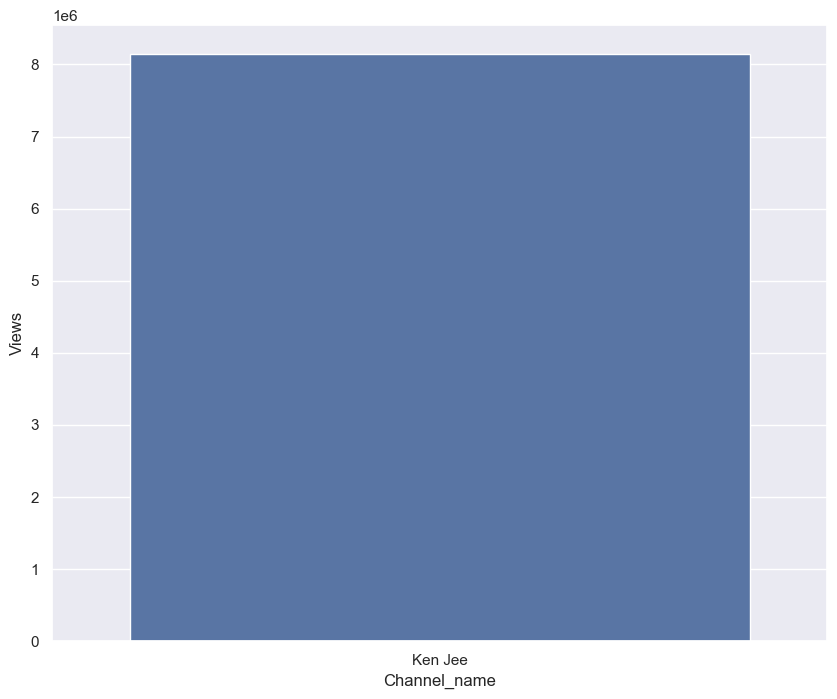

In [104]:
ax = sns.barplot(x='Channel_name',y='Views',data=channel_data)

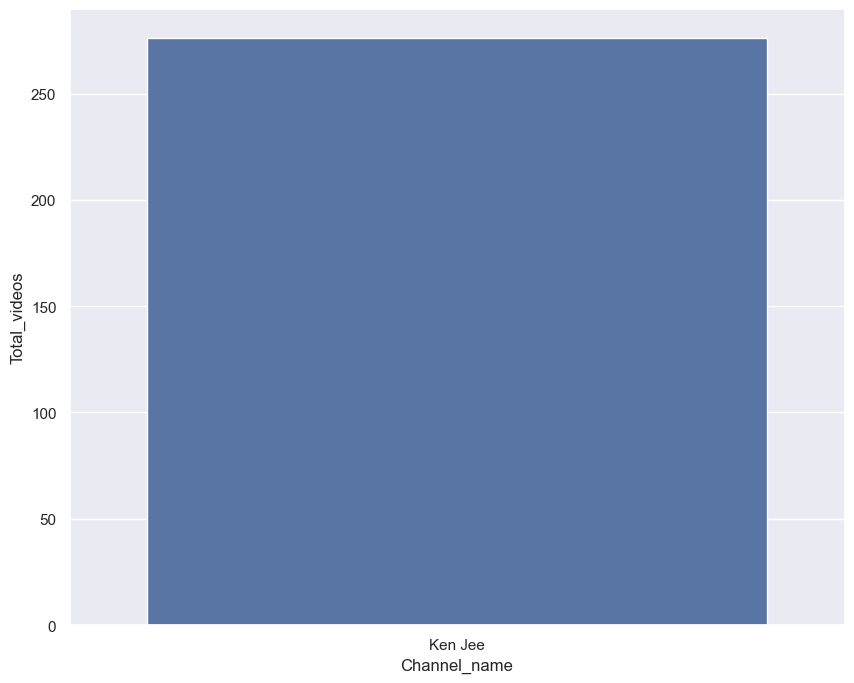

In [105]:
ax = sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

##  Function to get video ids

In [106]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ken Jee', 'playlist_id'].iloc[0]

In [120]:
def get_video_ids(youtube, playlist_id):

    #prepare request from youtube api
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50
                )
    
    #execute request and store as response
    response = request.execute()

    #store video ids in list
    video_ids = []
    for i in range (len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    #check for next page
    print("nextPageToken(first part) = "+response.get('nextPageToken'))
    next_page_token = response.get('nextPageToken')
    more_pages = True
    while more_pages:
        #if no more pages, update more_pages variable to False
        if next_page_token is None:
            more_pages = False
        #if there are more pages, run the request with pageToken and append video_ids
        else:
            #run new request with page Token
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token
                )
            
            #execute new request
            response = request.execute()

            #loop through new video ids
            for i in range (len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            #update next_page_token for next round of while loop
            print("nextPageToken second part= "+str(response.get('nextPageToken')))
            next_page_token = response.get('nextPageToken')
            # print(next_page_token)


    return video_ids

In [121]:
video_ids = get_video_ids(youtube, playlist_id)

nextPageToken(first part) = EAAaBlBUOkNESQ
nextPageToken second part= EAAaBlBUOkNHUQ
nextPageToken second part= EAAaB1BUOkNKWUI
nextPageToken second part= EAAaB1BUOkNNZ0I
nextPageToken second part= EAAaB1BUOkNQb0I
nextPageToken second part= None


In [122]:
video_ids

['HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59-rTxA',
 '-2U2CMYom00',
 'KEeUR8UDy-s',
 '0jTtHYie3CU',
 '2RWwN5ZT4tA',
 'rEWPqw6rMGI',
 'o-wsyxWbPOw',
 'xpIFS6jZbe8',
 '-zbLpoJVBMI',
 'scSc6YSanQ0',
 'FqNpDNmpcEo',
 'vwvdtX

Function to get video details

In [ ]:
# def get_video_details(youtube, video_ids):
